1. Exercise 1:


Load penguins dataset from seaborn, use bill_length_mm and bill_depth_mm to build a logistic regression model to classify Adelie species and Not Adelie species.

 

2. Exercise 2:

Similar to Exercise 1, but now usingbill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g.

EX 1:

In [305]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [306]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


DESCRIBE

In [307]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [308]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [309]:
penguins_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [310]:
penguins_df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

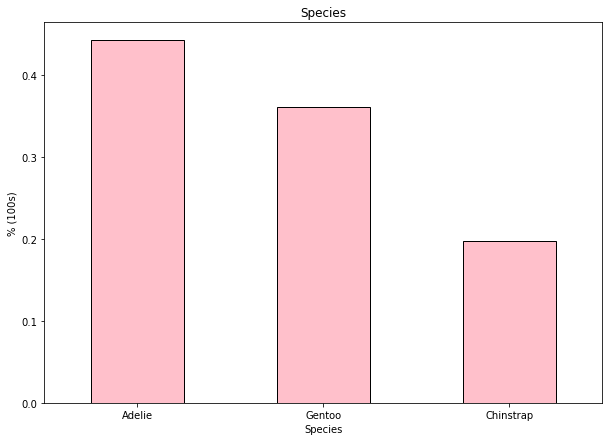

In [311]:
plt.rcParams['figure.figsize'] = (10,7)

penguins_df['species'].value_counts(normalize = True).plot(kind = 'bar', color = 'pink', linewidth = 1, edgecolor = 'k')
plt.title('Species')
plt.xlabel('Species')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

MISSING DATA

In [312]:
penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [313]:
penguins_df[penguins_df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [314]:
penguins_df.drop(index=[3,339], inplace=True) 
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [315]:
penguins_df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [316]:
penguins_df['sex'].fillna(penguins_df['sex'].mode()[0], inplace = True)

In [317]:
penguins_df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [318]:
penguins_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,Male
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,Male
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,Male


In [319]:
class_counts = penguins_df.groupby('sex').size()
print(class_counts)

sex
Female    165
Male      177
dtype: int64


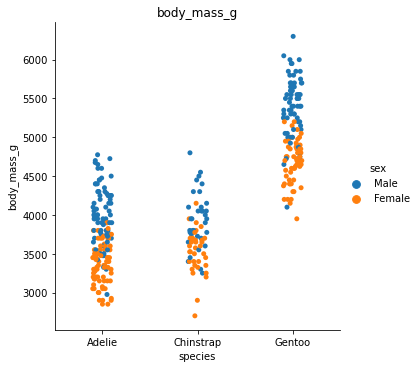

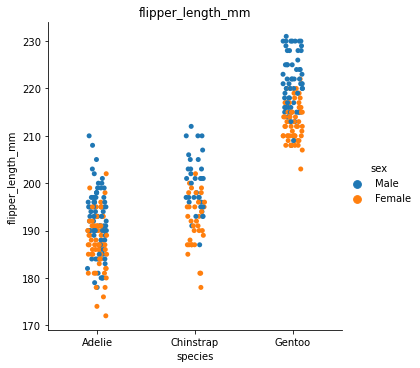

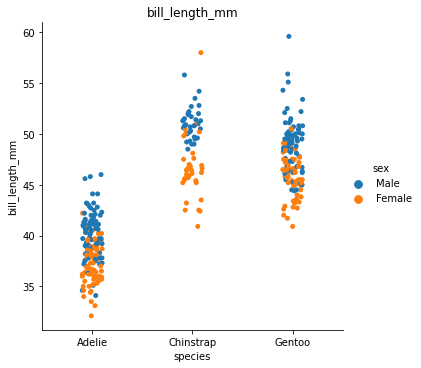

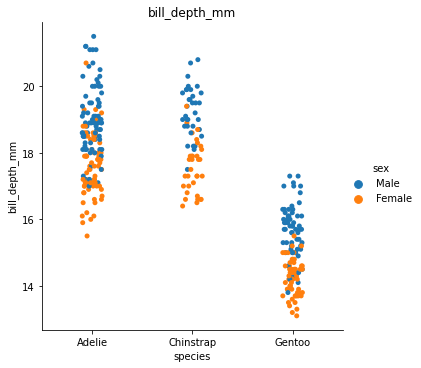

In [320]:
_ = sns.catplot(x = 'species', y = 'body_mass_g', data = penguins_df, hue="sex").set(title="body_mass_g") 
_ = sns.catplot(x = 'species', y = 'flipper_length_mm', data = penguins_df, hue="sex").set(title="flipper_length_mm") 
_ = sns.catplot(x = 'species', y = 'bill_length_mm', data = penguins_df, hue="sex").set(title="bill_length_mm") 
_ = sns.catplot(x = 'species', y = 'bill_depth_mm', data = penguins_df, hue="sex").set(title="bill_depth_mm") 

In [321]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [322]:
penguins_df['is_adelie'] = penguins_df.species.apply(
    lambda x : True if x == 'Adelie' else False)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False


In [323]:
penguins_adelie_df = penguins_df[penguins_df.is_adelie]
penguins_adelie_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female,True
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female,True
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male,True
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female,True


In [324]:
penguins_not_adelie_df = penguins_df[~penguins_df.is_adelie].sample(
    191, random_state=1)
penguins_not_adelie_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male,False
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male,False
265,Gentoo,Biscoe,43.6,13.9,217.0,4900.0,Female,False
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female,False
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male,False
...,...,...,...,...,...,...,...,...
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,Male,False
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,Male,False
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male,False
292,Gentoo,Biscoe,48.2,15.6,221.0,5100.0,Male,False


In [325]:
df = pd.concat([penguins_adelie_df, penguins_not_adelie_df])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,Male,False
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,Male,False
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male,False
292,Gentoo,Biscoe,48.2,15.6,221.0,5100.0,Male,False


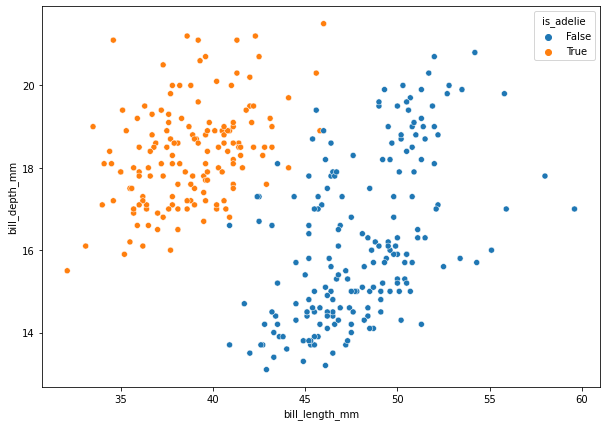

In [326]:
sns.scatterplot(data = df, x ='bill_length_mm', y = 'bill_depth_mm', hue = 'is_adelie')
plt.show()

In [327]:
y = df['is_adelie']
y.shape

(342,)

In [328]:
X= penguins_df[['bill_length_mm', 'bill_depth_mm']]
X.shape

(342, 2)

In [329]:
X

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [330]:
def X_prep(X):
    x_1 = np.ones((1, X.shape[1]))
    X = np.concatenate((x_1, X), axis = 0).T

    return X

X = X_prep(X.T)
X.shape

(342, 3)

In [331]:
X[:5]

array([[ 1. , 39.1, 18.7],
       [ 1. , 39.5, 17.4],
       [ 1. , 40.3, 18. ],
       [ 1. , 36.7, 19.3],
       [ 1. , 39.3, 20.6]])

MODEL

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [333]:
log_reg = LogisticRegression(fit_intercept=False)
log_reg

LogisticRegression(fit_intercept=False)

In [334]:
log_reg.fit(X,y)

LogisticRegression(fit_intercept=False)

In [335]:
log_reg.coef_

array([[ 0.43922772, -1.17866589,  2.83309553]])

In [336]:
sklearn_y_pred = log_reg.predict(X)
sklearn_y_pred.shape

(342,)

In [337]:
print(classification_report(y, sklearn_y_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       191
        True       0.99      0.98      0.98       151

    accuracy                           0.99       342
   macro avg       0.99      0.98      0.99       342
weighted avg       0.99      0.99      0.99       342



Ex 2:

In [338]:
df = penguins_df.drop(columns=['island', 'sex'])
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,is_adelie
0,Adelie,39.1,18.7,181.0,3750.0,True
1,Adelie,39.5,17.4,186.0,3800.0,True
2,Adelie,40.3,18.0,195.0,3250.0,True
4,Adelie,36.7,19.3,193.0,3450.0,True
5,Adelie,39.3,20.6,190.0,3650.0,True
...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,False
340,Gentoo,46.8,14.3,215.0,4850.0,False
341,Gentoo,50.4,15.7,222.0,5750.0,False
342,Gentoo,45.2,14.8,212.0,5200.0,False


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   is_adelie          342 non-null    bool   
dtypes: bool(1), float64(4), object(1)
memory usage: 16.4+ KB


In [340]:
X_1 = df[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X_1

,bill_depth_mm,bill_length_mm,flipper_length_mm,body_mass_g
0,18.7,39.1,181.0,3750.0
1,17.4,39.5,186.0,3800.0
2,18.0,40.3,195.0,3250.0
4,19.3,36.7,193.0,3450.0
5,20.6,39.3,190.0,3650.0
...,...,...,...,...
338,13.7,47.2,214.0,4925.0
340,14.3,46.8,215.0,4850.0
341,15.7,50.4,222.0,5750.0
342,14.8,45.2,212.0,5200.0


In [341]:
X_1 = X_prep(X.T)
X_1.shape

(342, 4)

In [342]:
X_1[:5]

array([[ 1. ,  1. , 39.1, 18.7],
       [ 1. ,  1. , 39.5, 17.4],
       [ 1. ,  1. , 40.3, 18. ],
       [ 1. ,  1. , 36.7, 19.3],
       [ 1. ,  1. , 39.3, 20.6]])

In [343]:
y_1 = df['is_adelie']
y_1

0       True
1       True
2       True
4       True
5       True
       ...  
338    False
340    False
341    False
342    False
343    False
Name: is_adelie, Length: 342, dtype: bool

In [344]:
log_reg.fit(X_1,y_1)

LogisticRegression(fit_intercept=False)

In [345]:
log_reg.coef_

array([[ 0.42794136,  0.42794136, -1.17760775,  2.80740056]])

In [346]:
sklearn_y_pred = log_reg.predict(X_1)
sklearn_y_pred.shape

(342,)

In [347]:
print(classification_report(y_1, sklearn_y_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98       191
        True       0.99      0.97      0.98       151

    accuracy                           0.98       342
   macro avg       0.98      0.98      0.98       342
weighted avg       0.98      0.98      0.98       342

